In [39]:
with open("Pickled_Object/SciBert-token1", "rb") as f:
    x = pickle.load(f)
    print(x.sd)
    print(x.average)

0.1096336026275501
0.8819705884798953


In [2]:
import pickle

import pandas as pd
import seaborn as sns

def prepareData(file):

    with open('Pickled_Object/' + file, 'rb') as f:
        x = pickle.load(f)
        
    
    if("0" in file): 
        file = file.replace("0", "A*")
    if("1" in file): file = file.replace("1", "A")
    if("2" in file): file = file.replace("2", "B")
    if("3" in file): file = file.replace("3", "C")
    if("4" in file): file = file.replace("4", "non-scientific")
    datalist = zip([file for i in range(0,len(x.values))],[float(v) for v in  x.values])
        
    return pd.DataFrame(datalist, columns=["model/rank", "score"])
        
    

In [1]:
import pickle
class Analysis(object):
    def __init__(self, values, average, sd):
        self.values = values
        self.average = average
        self.sd = sd
        
    def __enter__(self):
        return __reps__(self)

    def __exit__(self, type, value, tb):
        self.stream.close()
        
    def __repr__(self):
        return "avg: " + str(self.average) + "\nStandDev: " + str(self.sd) + "\nValues: " + str(self.values)

In [3]:
filenames = ["WideMLP-0", "WideMLP-1", "WideMLP-2", "WideMLP-3"]

wide_df_as = prepareData("WideMLP-0")
wide_df_a = prepareData("WideMLP-1")
wide_df_b = prepareData("WideMLP-2")
wide_df_c = prepareData("WideMLP-3")
wide_df_non_sci = prepareData("WideMLP-4")


wide_df = pd.concat([wide_df_as, wide_df_a, wide_df_b, wide_df_c, wide_df_non_sci], ignore_index=True)

In [4]:
bert_df_as = prepareData("Bert-0")
bert_df_a = prepareData("Bert-1")
bert_df_b = prepareData("Bert-2")
bert_df_c = prepareData("Bert-3")
bert_df_reddit = prepareData("Bert-4")

bert_df = pd.concat([bert_df_as, bert_df_a, bert_df_b, bert_df_c, bert_df_reddit], ignore_index=True)

In [5]:
sci_bert_as = prepareData("SciBert-0")
sci_bert_a = prepareData("SciBert-1")
sci_bert_b = prepareData("SciBert-2")
sci_bert_c = prepareData("SciBert-3")
sci_bert_reddit = prepareData("SciBert-4")

sci_bert_df = pd.concat([sci_bert_as, sci_bert_as, sci_bert_a, sci_bert_b, sci_bert_c,sci_bert_reddit], ignore_index=True)

In [6]:
data = pd.concat([wide_df, bert_df, sci_bert_df], ignore_index=True)

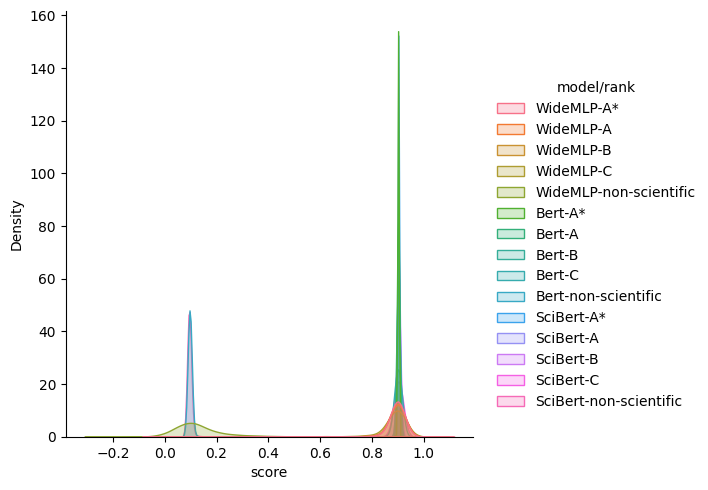

In [30]:
plot = sns.displot(data, x="score", hue="model/rank", kind="kde", fill=True, common_norm=False)

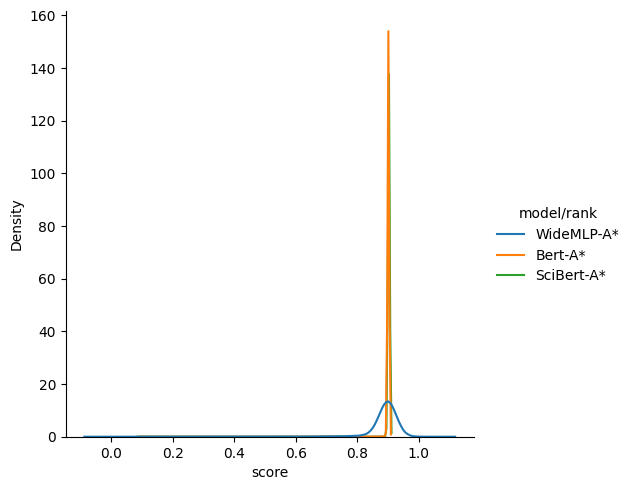

In [8]:
as_rank_df = pd.concat([wide_df_as, bert_df_as, sci_bert_as], ignore_index=True)
as_plot = sns.displot(as_rank_df, x="score", hue="model/rank", kind="kde", fill=False, common_norm=False)

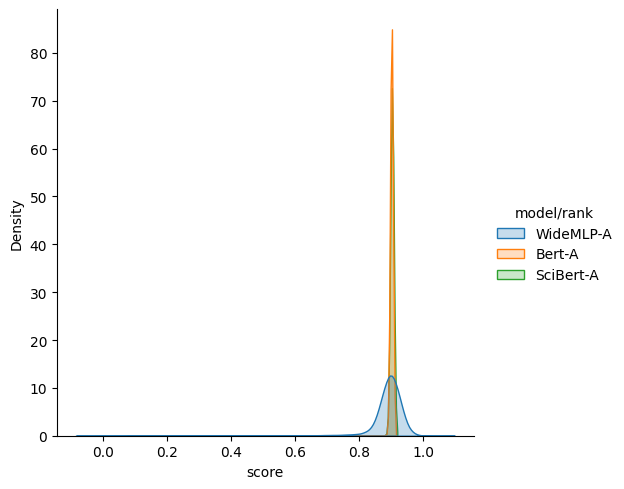

In [10]:
a_rank_df = pd.concat([wide_df_a, bert_df_a, sci_bert_a], ignore_index=True)
a_plot = sns.displot(a_rank_df, x="score", hue="model/rank", kind="kde", fill=True, common_norm=False)

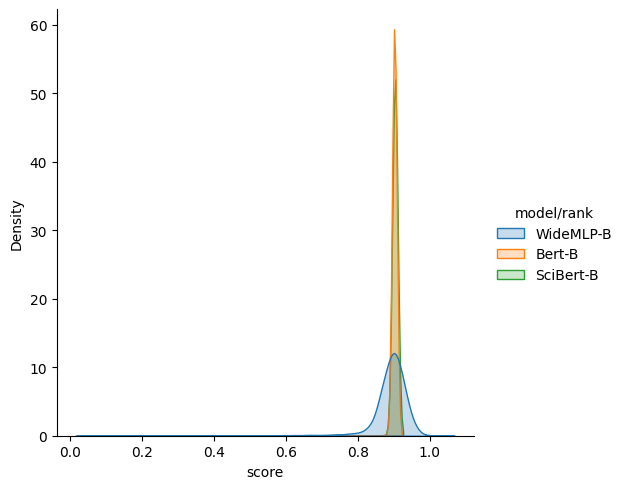

In [11]:
b_rank_df = pd.concat([wide_df_b, bert_df_b, sci_bert_b], ignore_index=True)
b_plot = sns.displot(b_rank_df, x="score", hue="model/rank", kind="kde", fill=True, common_norm=False)

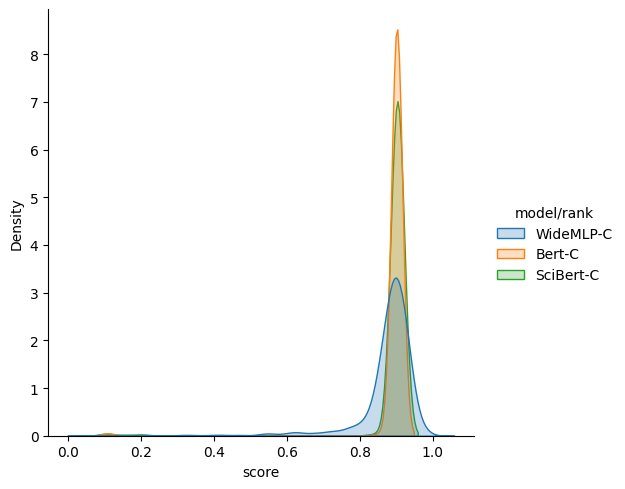

In [12]:
c_rank_df = pd.concat([wide_df_c, bert_df_c, sci_bert_c], ignore_index=True)
c_plot = sns.displot(c_rank_df, x="score", hue="model/rank", kind="kde", fill=True, common_norm=True)

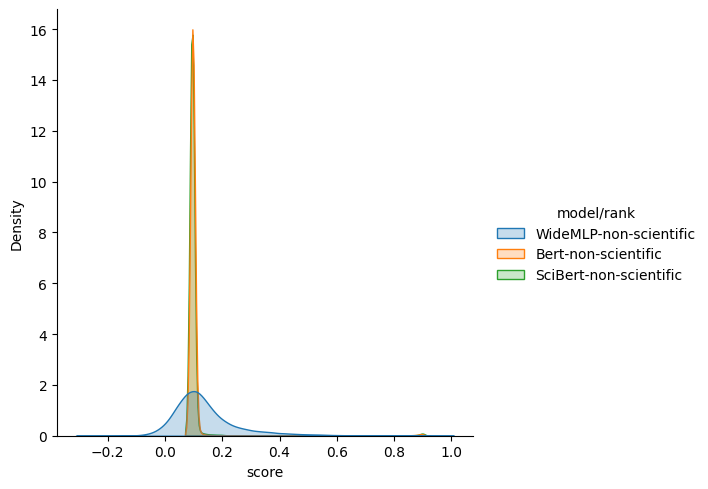

In [13]:
unscientific_df = pd.concat([wide_df_non_sci, bert_df_reddit, sci_bert_reddit], ignore_index=True)
unscientific_plot = sns.displot(unscientific_df, x="score", hue="model/rank", kind="kde", fill=True, common_norm=True)

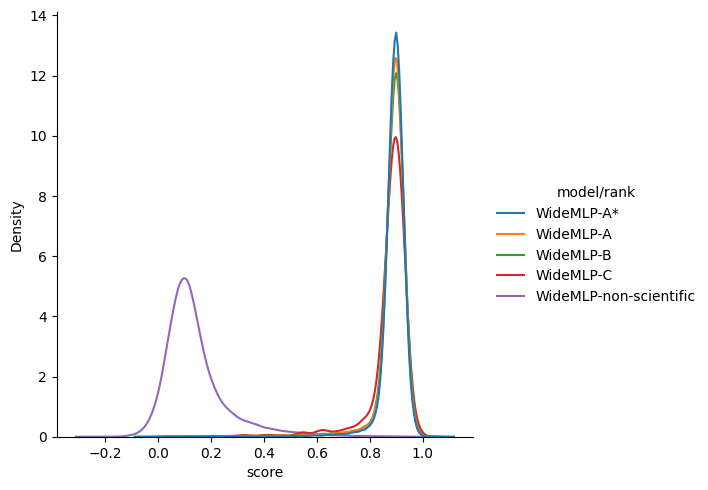

In [14]:
wide_plot = sns.displot(wide_df, x="score", hue="model/rank", kind="kde", fill=False, common_norm=False)

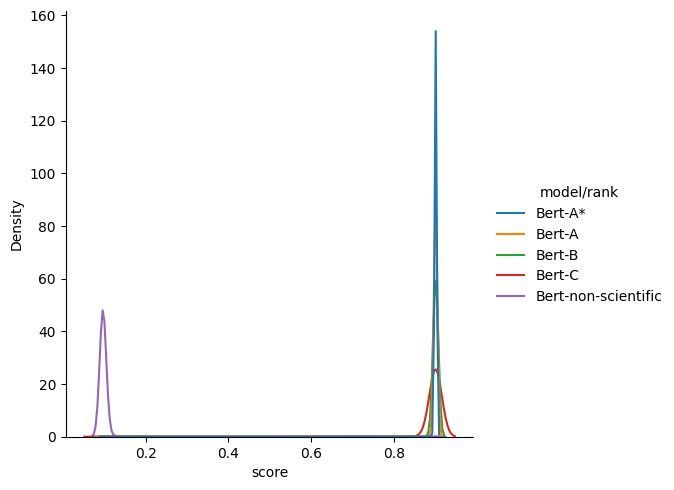

In [15]:
bert_plot = sns.displot(bert_df, x="score", hue="model/rank", kind="kde", fill=False, common_norm=False)

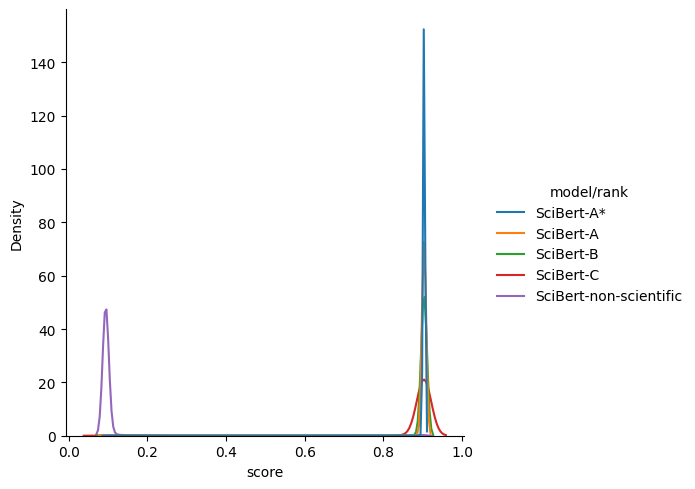

In [16]:
scibert_plot = sns.displot(sci_bert_df, x="score", hue="model/rank", kind="kde", fill=False, common_norm=False)

In [31]:
scibert_plot.savefig("Plots/SciBert.pdf")
bert_plot.savefig("Plots/Bert.pdf")
wide_plot.savefig("Plots/wide.pdf")
as_plot.savefig("Plots/As.pdf")
a_plot.savefig("Plots/A.pdf")
b_plot.savefig("Plots/B.pdf")
c_plot.savefig("Plots/C.pdf")
plot.savefig("Plots/Full.pdf")

In [18]:
wide_df_non_sci

,model/rank,score
0,WideMLP-non-scientific,-0.274477
1,WideMLP-non-scientific,-0.221825
2,WideMLP-non-scientific,-0.210792
3,WideMLP-non-scientific,-0.200025
4,WideMLP-non-scientific,-0.193741
...,...,...
99996,WideMLP-non-scientific,0.940687
99997,WideMLP-non-scientific,0.949171
99998,WideMLP-non-scientific,0.955686
99999,WideMLP-non-scientific,0.970374


In [19]:
def prepareData_token(file):

    with open('Pickled_Object/' + file, 'rb') as f:
        x = pickle.load(f)
    file = file.replace("token", "")    
    if("-" in file): file = file.replace("-", "")
    if("0" in file): file = file.replace("0", "-Original")
    if("1" in file): file = file.replace("1", "-Modified")
    datalist = zip([file for i in range(0,len(x.values))],[float(v) for v in  x.values])
        
    return pd.DataFrame(datalist, columns=["model/rank", "score"])
        
    

In [20]:
bert_clean = prepareData_token("Bert-token0")
bert_token = prepareData_token("Bert-token1")


sci_bert_clean = prepareData_token("SciBert-token0")
sci_bert_token = prepareData_token("SciBert-token1")

wide_clean = prepareData_token("WideMLP-token-0")
wide_token = prepareData_token("WideMLP-token-1")

In [21]:
bert_token_df = pd.concat([bert_clean, bert_token], ignore_index=True)
sci_bert_token_df = pd.concat([sci_bert_clean, sci_bert_token], ignore_index=True)
wide_token_df = pd.concat([wide_clean, wide_token], ignore_index=True)

token_df = pd.concat([bert_token_df, sci_bert_token_df, wide_token_df], ignore_index=True)

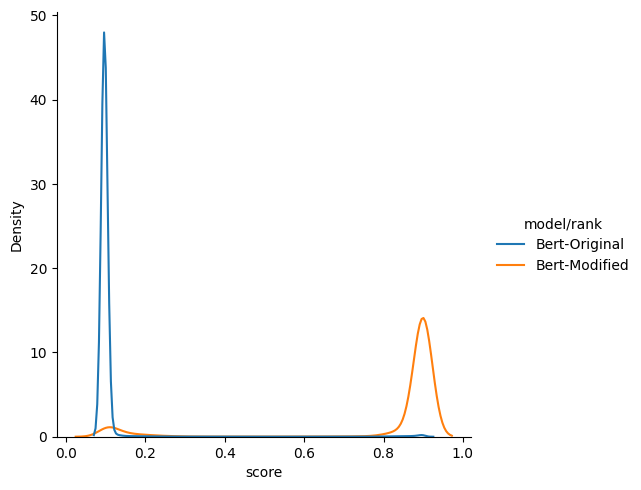

In [22]:
bert_token_plot = sns.displot(bert_token_df, x="score", hue="model/rank", kind="kde", fill=False, common_norm=False)

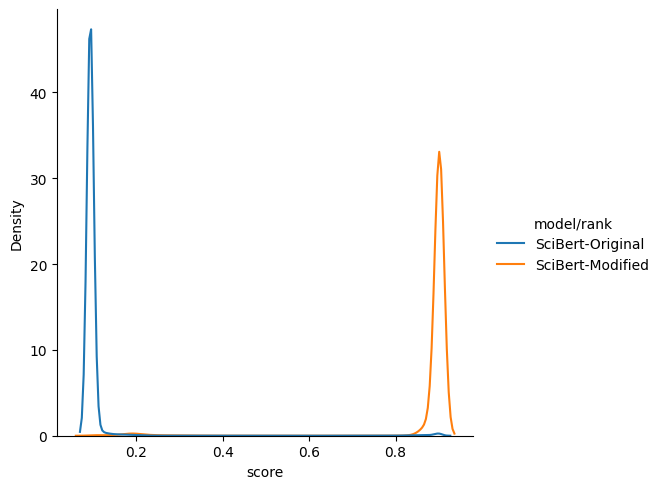

In [23]:
sci_bert_token_plot = sns.displot(sci_bert_token_df, x="score", hue="model/rank", kind="kde", fill=False, common_norm=False)

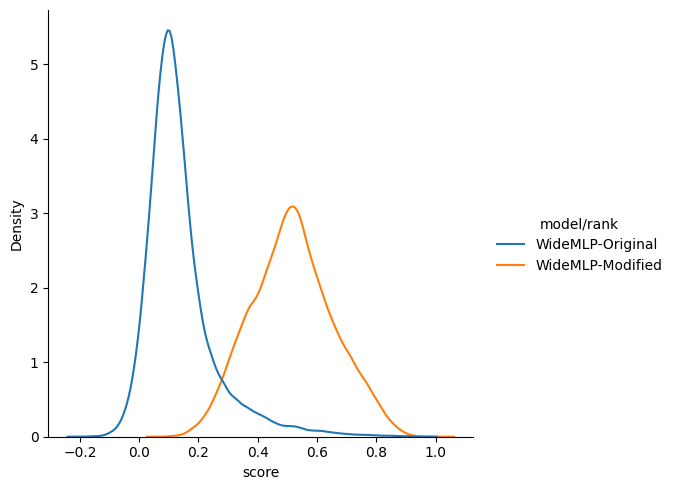

In [24]:
wide_token_plot = sns.displot(wide_token_df, x="score", hue="model/rank", kind="kde", fill=False, common_norm=False)

In [25]:
bert_token_plot.savefig("Plots/bert-token.pdf")
sci_bert_token_plot.savefig("Plots/sci_bert-token.pdf")

In [26]:
wide_token_plot.savefig("Plots/wide-token.pdf")

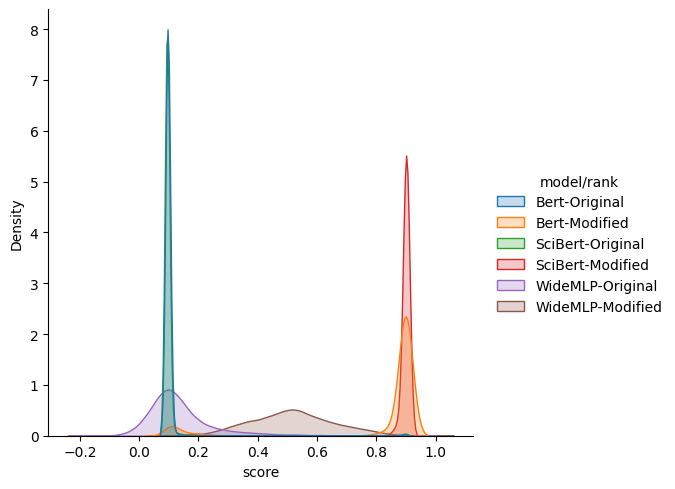

In [27]:
token_plot = sns.displot(token_df, x="score", hue="model/rank", kind="kde", fill=True, common_norm=True)

In [28]:
token_plot.savefig("Plots/Tokens.pdf")